In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the iris dataset from CSV
df = pd.read_csv('/content/car_evaluation (3).csv')
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)
# Check for null values in each column and drop them
print("Null values in each column:")
print(df.isnull().sum())
df.dropna(inplace=True)
print("Shape after dropping null values:", df.shape)

# Check for duplicate rows and drop them
print("Number of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Shape after dropping duplicates:", df.shape)

# Display the first 5 rows of the dataset
print("First 5 rows:")
print(df.head())

# Display the last 5 rows of the dataset
print("Last 5 rows:")
print(df.tail())

# Display descriptive statistics of the dataset
print("Descriptive statistics:")
print(df.describe())

# Print the column names
print("Column names:")
print(df.columns)
print("\n\n")
# Print unique values in the target column (assuming the target column is named 'species')
print("Unique target values:")
print(df['outcome'].unique())


Shape of the dataset: (1728, 7)
Null values in each column:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64
Shape after dropping null values: (1728, 7)
Number of duplicate rows: 0
Shape after dropping duplicates: (1728, 7)
First 5 rows:
  buying  maint  doors  persons lug_boot safety outcome
0  vhigh  vhigh      2        2    small    low   unacc
1  vhigh  vhigh      2        2    small    med   unacc
2  vhigh  vhigh      2        2    small   high   unacc
3  vhigh  vhigh      2        2      med    low   unacc
4  vhigh  vhigh      2        2      med    med   unacc
Last 5 rows:
     buying maint  doors  persons lug_boot safety outcome
1723    low   low      5        5      med    med    good
1724    low   low      5        5      med   high   vgood
1725    low   low      5        5      big    low   unacc
1726    low   low      5        5      big    med    good
1727    low   low      5        5      big   high   vgood
Des

In [8]:
from sklearn.preprocessing import LabelEncoder
# 6. LABEL ENCODER FOR DATASET TO CONVERT CATEGORICAL VALUES TO NUMBERS
encoder = LabelEncoder()
## Applying encoding to each categorical column in features
df['buying'] = encoder.fit_transform(df['buying'])
df['maint'] = encoder.fit_transform(df['maint'])
df['doors'] = encoder.fit_transform(df['doors'])
df['persons'] = encoder.fit_transform(df['persons'])
df['lug_boot'] = encoder.fit_transform(df['lug_boot'])
df['safety'] = encoder.fit_transform(df['safety'])
#Optionally, you may also encode the target variable if required
df['outcome'] = encoder.fit_transform(df['outcome'])

In [10]:
df.head(3)

,buying,maint,doors,persons,lug_boot,safety,outcome
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2


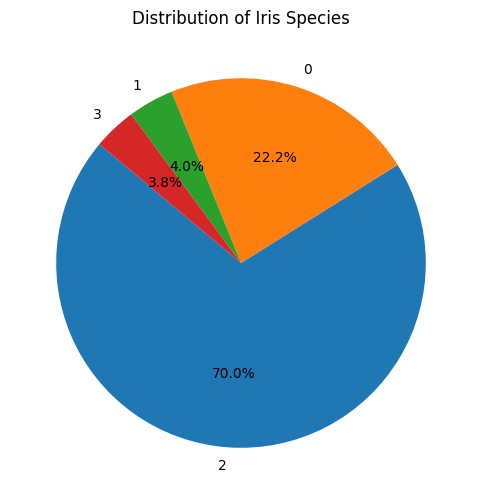

In [11]:
# Pie Chart for target distribution
target_counts = df['outcome'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Iris Species')
plt.show()

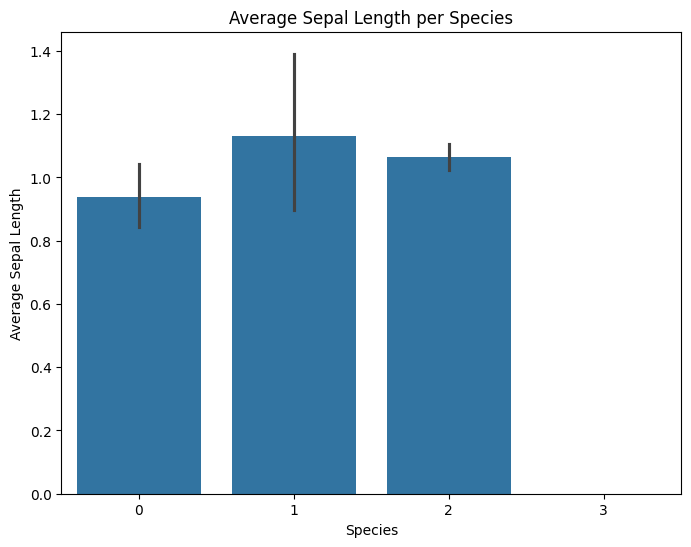

In [13]:
# Bar Graph for Average Sepal Length per Species
plt.figure(figsize=(8,6))
sns.barplot(x='outcome', y='safety', data=df)
plt.title('Average Sepal Length per Species')
plt.xlabel('Species')
plt.ylabel('Average Sepal Length')
plt.show()


In [15]:
# Define features and target variable
# Assuming features are all columns except 'species'
X = df.drop('outcome', axis=1)
y = df['outcome']

# Split the dataset into training and testing sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (1209, 6)
Shape of X_test: (519, 6)


In [16]:
# Define the SVM model (using a linear kernel; you can change to 'rbf' or other kernels if desired)
svm_model = SVC(kernel='linear', random_state=42)

In [17]:
# Train the SVM model on the training set
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [18]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

# Calculate Accuracy, Precision, Recall, and F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
[[ 16   0 102   0]
 [  0   0  19   0]
 [  5   0 353   0]
 [ 10   0  14   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.14      0.21       118
           1       0.00      0.00      0.00        19
           2       0.72      0.99      0.83       358
           3       0.00      0.00      0.00        24

    accuracy                           0.71       519
   macro avg       0.31      0.28      0.26       519
weighted avg       0.62      0.71      0.62       519

Accuracy: 0.7109826589595376
Precision: 0.6163127949143544
Recall: 0.7109826589595376
F1 Score: 0.6244677900987047


In [20]:
# Perform 5-fold cross-validation on the whole dataset
cv_scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.69942197 0.74855491 0.74277457 0.72173913 0.71304348]
Mean Cross-Validation Score: 0.7251068107564715


In [22]:
from collections import Counter
Counter(df.outcome)

Counter({2: 1210, 0: 384, 3: 65, 1: 69})

In [23]:
# Parameter Tuning
model = SVC(C=0.1)# c=0.1
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.6897880539499036

In [24]:
#gamma
model = SVC(gamma=0.01)# gamma=0.01
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.6897880539499036

In [25]:
model = SVC(kernel='poly')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8651252408477842

First 5 rows of the dataset:
  buying  maint  doors  persons lug_boot safety outcome
0  vhigh  vhigh      2        2    small    low   unacc
1  vhigh  vhigh      2        2    small    med   unacc
2  vhigh  vhigh      2        2    small   high   unacc
3  vhigh  vhigh      2        2      med    low   unacc
4  vhigh  vhigh      2        2      med    med   unacc


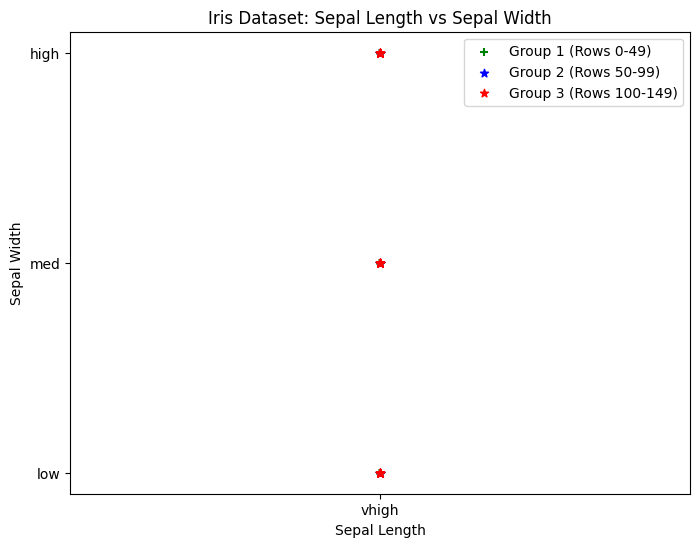

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the iris dataset from CSV file
data = pd.read_csv('/content/car_evaluation (3).csv')
print("First 5 rows of the dataset:")
print(data.head())
from sklearn.preprocessing import LabelEncoder
# 6. LABEL ENCODER FOR DATASET TO CONVERT CATEGORICAL VALUES TO NUMBERS
encoder = LabelEncoder()
## Applying encoding to each categorical column in features
df['buying'] = encoder.fit_transform(df['buying'])
df['maint'] = encoder.fit_transform(df['maint'])
df['doors'] = encoder.fit_transform(df['doors'])
df['persons'] = encoder.fit_transform(df['persons'])
df['lug_boot'] = encoder.fit_transform(df['lug_boot'])
df['safety'] = encoder.fit_transform(df['safety'])
#Optionally, you may also encode the target variable if required
df['outcome'] = encoder.fit_transform(df['outcome'])

# Visualisation:
# Splitting the dataset into three parts (assumed order: first 50 = one species, next 50 = another, final 50 = third)
df0 = data[:50]
df1 = data[50:100]
df2 = data[100:150]

# Optional: Extracting features and target (first 100 rows, first 2 columns and target)
# Adjust 'target' if your CSV column is named differently (e.g., 'species')
x = data.iloc[:100, :2]
y = data['outcome'][:100]

# Plotting the scatter plots for the three groups
plt.figure(figsize=(8,6))
plt.scatter(df0['buying'], df0['safety'], color='green', marker='+', label='Group 1 (Rows 0-49)')
plt.scatter(df1['buying'], df1['safety'], color='blue', marker='*', label='Group 2 (Rows 50-99)')
plt.scatter(df2['buying'], df2['safety'], color='red', marker='*', label='Group 3 (Rows 100-149)')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset: Sepal Length vs Sepal Width')
plt.legend()
plt.show()


LINEARxREGRESSIONxOWNDATSET

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math

In [32]:
data=pd.read_csv('/content/employee_data.csv')

In [33]:
# -------------------------------
# Step 3: Display basic information, nulls and duplicates
# -------------------------------
print("\n--- CSV Data: Head ---")
print(data.head())

print("\n--- CSV Data: Tail ---")
print(data.tail())

print("\n--- CSV Data: Description ---")
print(data.describe(include='all'))

print("\n--- CSV Data: Null counts ---")
print(data.isnull().sum())

# Drop rows with null values
data.dropna(inplace=True)

print("\nAfter dropping null values:")
print(data.isnull().sum())

# Check for duplicates and drop them
duplicate_count = data.duplicated().sum()
print(f"\nNumber of duplicate rows before removal: {duplicate_count}")
data.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {data.duplicated().sum()}")


--- CSV Data: Head ---
   eid   salary  gender   age  car_purchased
0  101  50000.0    Male  28.0        15000.0
1  102  60000.0  Female  32.0        18000.0
2  103  55000.0    Male  29.0        16000.0
3  104  70000.0  Female  35.0        22000.0
4  105      NaN    Male  30.0        21000.0

--- CSV Data: Tail ---
    eid   salary  gender   age  car_purchased
15  116  66000.0    Male   NaN        20000.0
16  117  71000.0  Female  37.0        24000.0
17  118  68000.0    Male  33.0        23000.0
18  119  69000.0  Female  34.0        22000.0
19  120  72000.0    Male  36.0        25000.0

--- CSV Data: Description ---
               eid        salary gender        age  car_purchased
count    20.000000     18.000000     19  19.000000      19.000000
unique         NaN           NaN      2        NaN            NaN
top            NaN           NaN   Male        NaN            NaN
freq           NaN           NaN     10        NaN            NaN
mean    110.000000  64611.111111    NaN  32.7

In [34]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])



Frequency of car_purchased values:
Counter({22000.0: 2, 25000.0: 2, 23000.0: 2, 15000.0: 1, 18000.0: 1, 16000.0: 1, 19000.0: 1, 20000.0: 1, 17500.0: 1, 18500.0: 1, 24000.0: 1})


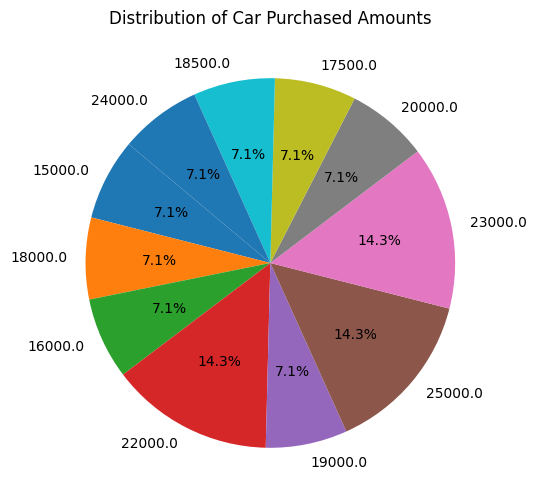

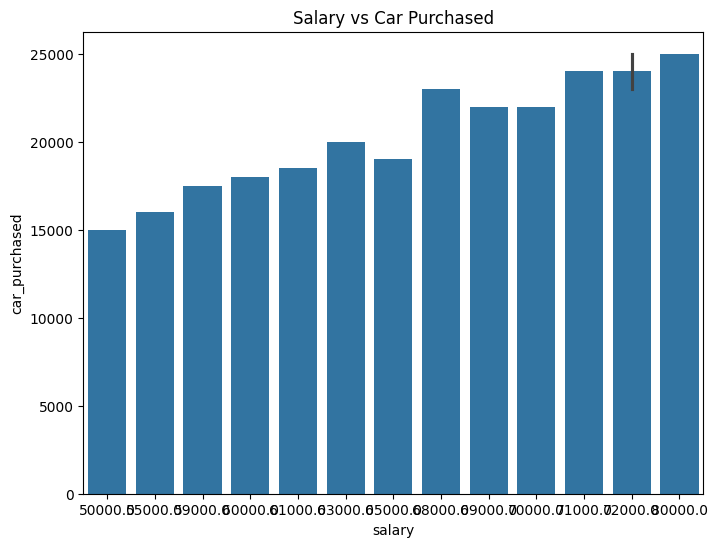

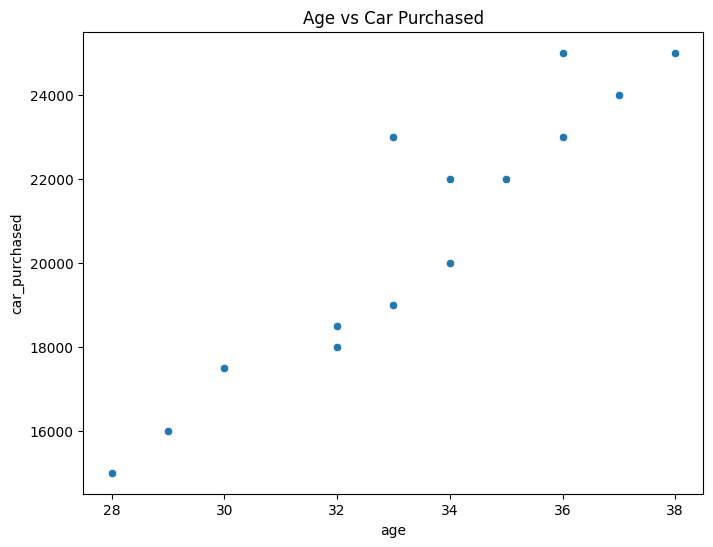

In [35]:
target_counts = Counter(data['car_purchased'])
print("\nFrequency of car_purchased values:")
print(target_counts)

# -------------------------------
# Step 5: Data Visualization
# -------------------------------
# Pie chart for the target variable frequencies (using Counter)
plt.figure(figsize=(6,6))
plt.pie(list(target_counts.values()), labels=list(target_counts.keys()), autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Car Purchased Amounts")
plt.show()

# Bar graph: Salary vs. Car Purchased
plt.figure(figsize=(8,6))
sns.barplot(x="salary", y="car_purchased", data=data)
plt.title("Salary vs Car Purchased")
plt.show()

# Scatter plot: Age vs. Car Purchased
plt.figure(figsize=(8,6))
sns.scatterplot(x="age", y="car_purchased", data=data)
plt.title("Age vs Car Purchased")
plt.show()

In [36]:
X = data[['salary']]
y = data['car_purchased']


In [37]:
# Split into training and test sets for simple regression
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
simple_model = LinearRegression()

In [40]:
simple_model.fit(X_train_s, y_train_s)

LinearRegression()

In [41]:
y_pred_simple = simple_model.predict(X_test_s)


--- Simple Linear Regression Metrics ---
Intercept: -10543.269230769234
Coefficient for salary: 0.47596153846153855
R² Score: 0.8257730497163904
MAE: 1152.884615384617
MSE: 2188290.4955621357
RMSE: 1479.2871579115854


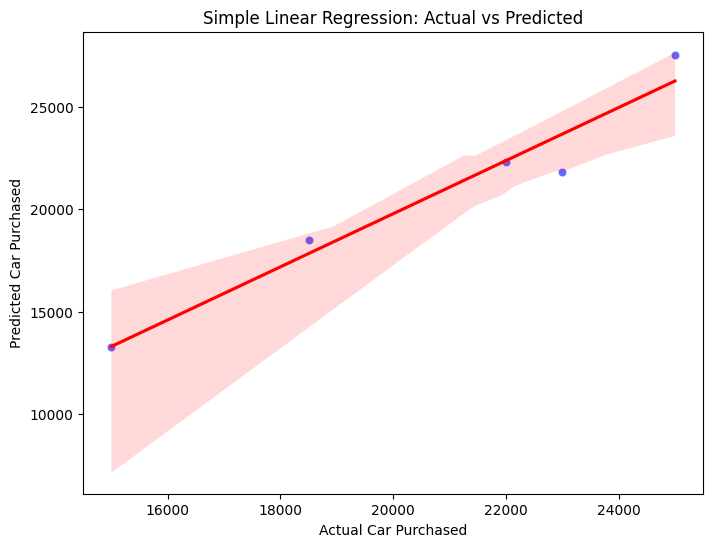

In [42]:
# Performance metrics for Simple Linear Regression
print("\n--- Simple Linear Regression Metrics ---")
print("Intercept:", simple_model.intercept_)
print("Coefficient for salary:", simple_model.coef_[0])
print("R² Score:", r2_score(y_test_s, y_pred_simple))
print("MAE:", mean_absolute_error(y_test_s, y_pred_simple))
print("MSE:", mean_squared_error(y_test_s, y_pred_simple))
print("RMSE:", math.sqrt(mean_squared_error(y_test_s, y_pred_simple)))

# Plot actual vs predicted for Simple Linear Regression
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_s, y=y_pred_simple, color='blue', alpha=0.6)
sns.regplot(x=y_test_s, y=y_pred_simple, scatter=False, color='red')
plt.xlabel("Actual Car Purchased")
plt.ylabel("Predicted Car Purchased")
plt.title("Simple Linear Regression: Actual vs Predicted")
plt.show()


--- Multiple Linear Regression Metrics ---
Intercept: -14071.111960259863
Coefficients: [2.08884219e-01 7.99140237e+02 6.16316393e+02]
R² Score: 0.8766633276839901
MAE: 1110.9056171188379
MSE: 1549108.6042890842
RMSE: 1244.6319151817875


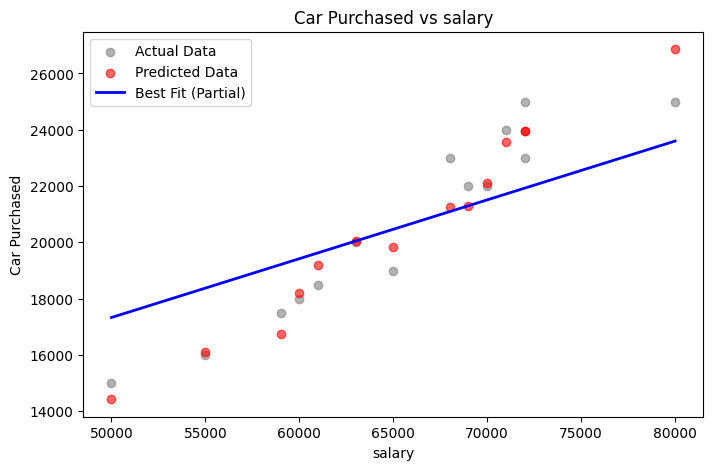

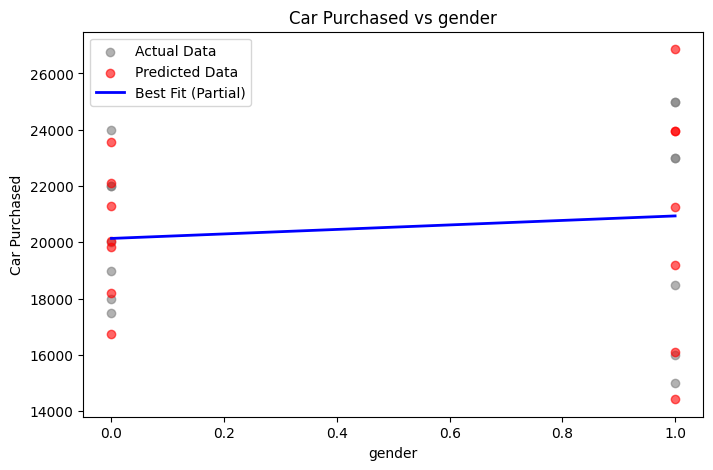

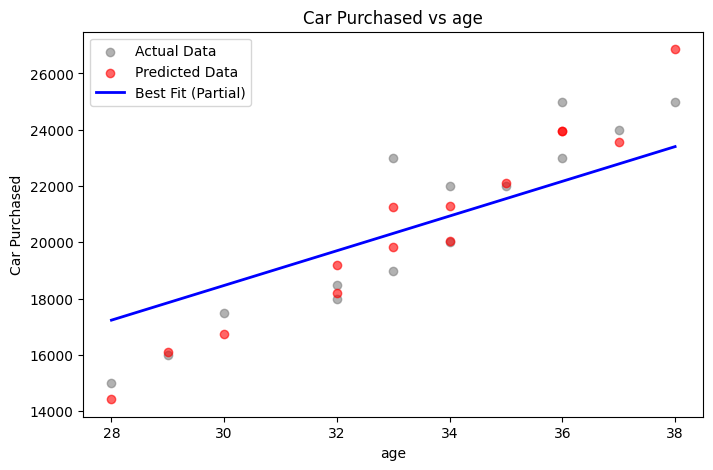


Experiment: EXPERIMENTx6 BY 229X1A2856


In [43]:
# For Multiple Linear Regression, we use all predictors: salary, gender, and age.
X_multiple = data[['salary', 'gender', 'age']]
# Split into training and test sets for multiple regression
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multiple, y, test_size=0.3, random_state=42)

multiple_model = LinearRegression()
multiple_model.fit(X_train_m, y_train_m)
y_pred_multiple = multiple_model.predict(X_test_m)

print("\n--- Multiple Linear Regression Metrics ---")
print("Intercept:", multiple_model.intercept_)
print("Coefficients:", multiple_model.coef_)
print("R² Score:", r2_score(y_test_m, y_pred_multiple))
print("MAE:", mean_absolute_error(y_test_m, y_pred_multiple))
print("MSE:", mean_squared_error(y_test_m, y_pred_multiple))
print("RMSE:", math.sqrt(mean_squared_error(y_test_m, y_pred_multiple)))

# For multiple regression, plotting best fit lines for each predictor individually:
features = ['salary', 'gender', 'age']
y_pred_all = multiple_model.predict(X_multiple)
for feature in features:
    plt.figure(figsize=(8, 5))
    plt.scatter(data[feature], data['car_purchased'], color='grey', alpha=0.6, label='Actual Data')
    plt.scatter(data[feature], y_pred_all, color='red', alpha=0.6, label='Predicted Data')
    # Partial best-fit line
    feature_range = np.linspace(data[feature].min(), data[feature].max(), 100)
    temp_data = {col: np.full(100, data[col].mean()) for col in features}
    temp_data[feature] = feature_range
    X_temp = pd.DataFrame(temp_data)
    y_temp = multiple_model.predict(X_temp)
    plt.plot(feature_range, y_temp, color='blue', linewidth=2, label='Best Fit (Partial)')
    plt.xlabel(feature)
    plt.ylabel('Car Purchased')
    plt.title(f'Car Purchased vs {feature}')
    plt.legend()
    plt.show()

print("\nExperiment: EXPERIMENTx6 BY 229X1A2856")

#VERSIONx2

Manually created DataFrame:
    eid   salary  gender   age  car_purchased
0   201  48000.0  Female  26.0        14000.0
1   202  52000.0    Male  30.0        16000.0
2   203  50000.0    Male  28.0        15000.0
3   204  58000.0  Female  33.0        18000.0
4   205  54000.0  Female  27.0        17000.0
5   206      NaN    Male  29.0        15500.0
6   207  60000.0  Female  32.0            NaN
7   208  63000.0    None  31.0        19000.0
8   209  57000.0    Male   NaN        16500.0
9   210  56000.0    Male  30.0        16000.0
10  201  48000.0  Female  26.0        14000.0
11  212  51000.0    Male  29.0        15500.0
12  213  53000.0    Male  30.0        16500.0
13  214  59000.0  Female  33.0        17500.0
14  215      NaN  Female  27.0        17000.0
15  216  61000.0    Male  28.0        16000.0
16  217  62000.0  Female  32.0        18500.0
17  218  58000.0    Male  31.0        18000.0
18  219  60000.0    Male  30.0        17500.0
19  220  63000.0  Female  29.0        19000.0

--- M

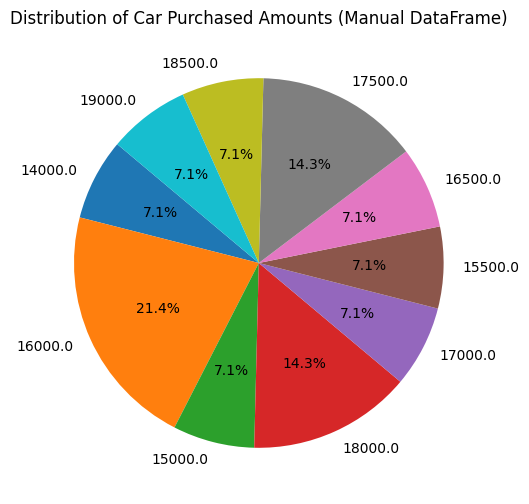

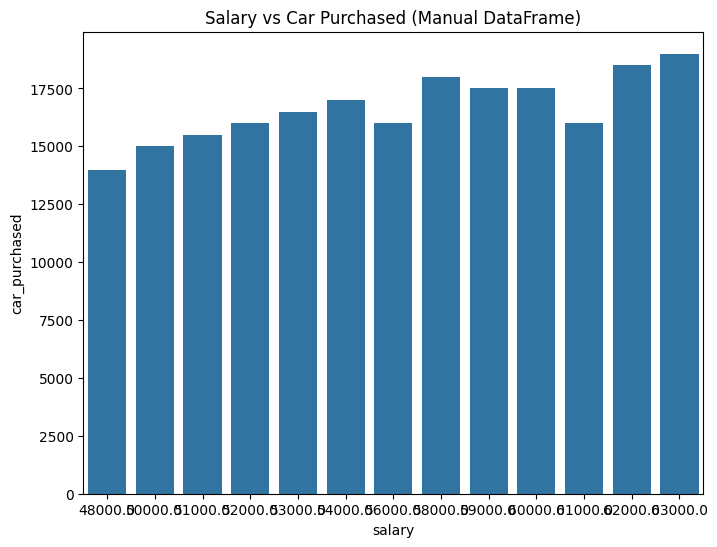

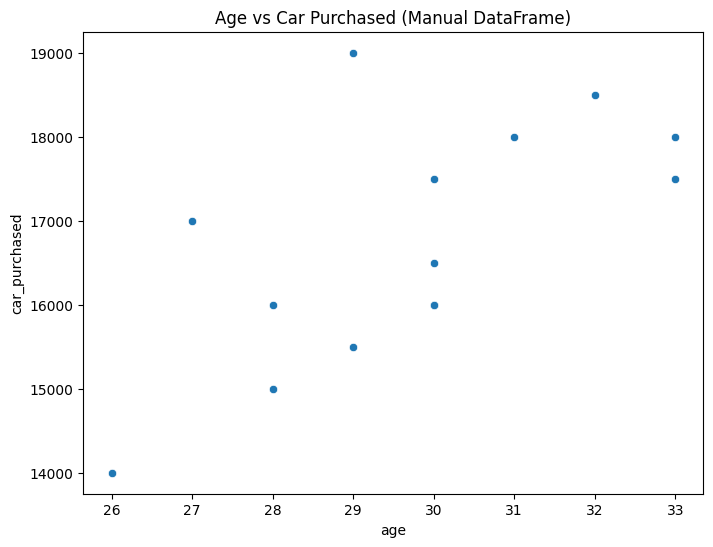


--- Simple Linear Regression Metrics (Manual DataFrame) ---
Intercept: 1684.2417061611395
Coefficient for salary: 0.274585308056872
R² Score: 0.1445267842388297
MAE: 1081.694312796209
MSE: 1676727.502891894
RMSE: 1294.8851311571593


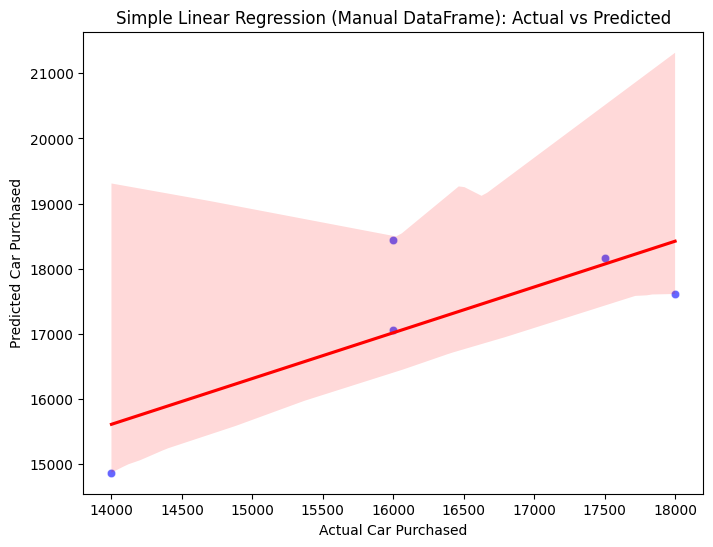


--- Multiple Linear Regression Metrics (Manual DataFrame) ---
Intercept: 4523.5556155507675
Coefficients: [ 2.40196409e-01 -4.37888094e+02 -2.41293197e+01]
R² Score: 0.22917301798307788
MAE: 1060.9914956803436
MSE: 1510820.8847531672
RMSE: 1229.1545406307407


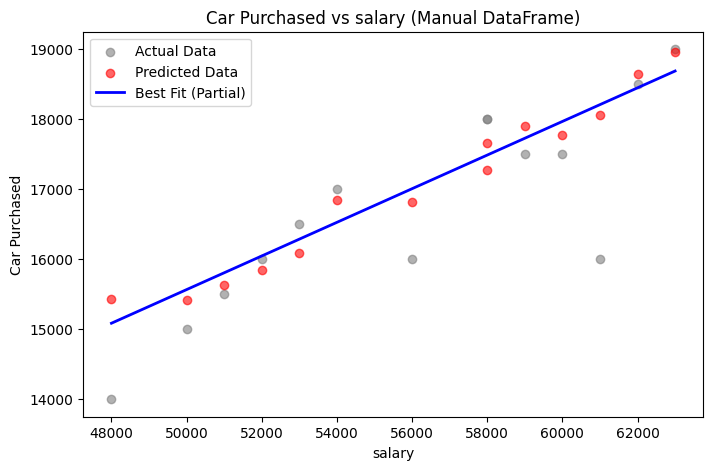

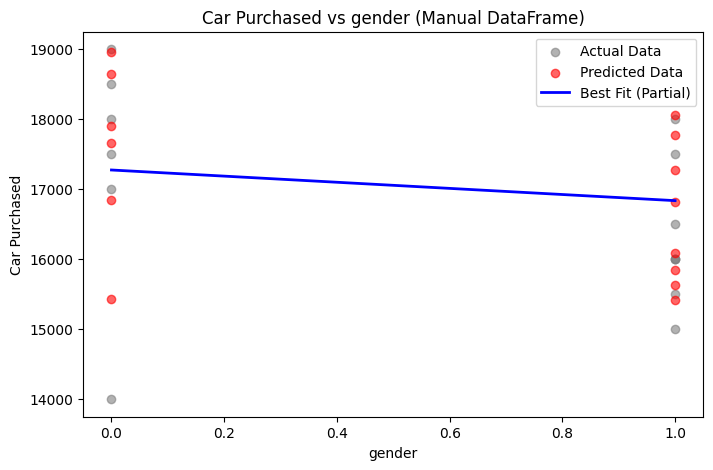

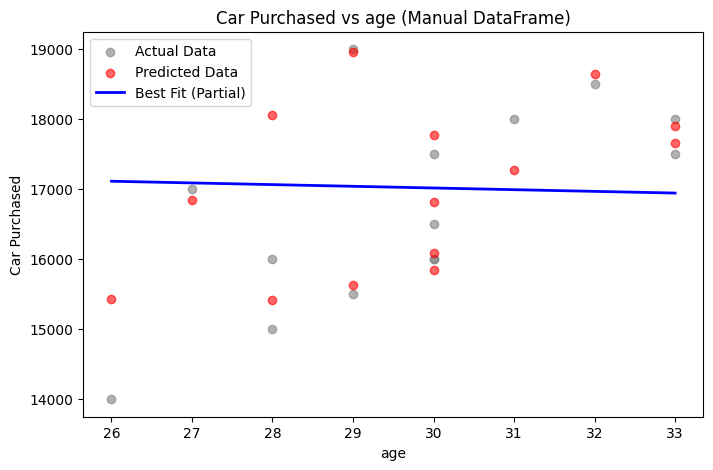


Experiment: EXPERIMENTx6 BY 229X1A2856


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math

# -------------------------------
# Step 1: Create the DataFrame manually
# -------------------------------
data_manual = pd.DataFrame({
    'eid': [201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
            201, 212, 213, 214, 215, 216, 217, 218, 219, 220],
    'salary': [48000, 52000, 50000, 58000, 54000, None, 60000, 63000, 57000, 56000,
               48000, 51000, 53000, 59000, None, 61000, 62000, 58000, 60000, 63000],
    'gender': ['Female', 'Male', 'Male', 'Female', 'Female',
               'Male', 'Female', None, 'Male', 'Male',
               'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female'],
    'age': [26, 30, 28, 33, 27, 29, 32, 31, None, 30,
            26, 29, 30, 33, 27, 28, 32, 31, 30, 29],
    'car_purchased': [14000, 16000, 15000, 18000, 17000, 15500, None, 19000, 16500, 16000,
                      14000, 15500, 16500, 17500, 17000, 16000, 18500, 18000, 17500, 19000]
})

print("Manually created DataFrame:")
print(data_manual)

# -------------------------------
# Step 2: Display basic information, nulls and duplicates
# -------------------------------
print("\n--- Manual Data: Head ---")
print(data_manual.head())

print("\n--- Manual Data: Tail ---")
print(data_manual.tail())

print("\n--- Manual Data: Description ---")
print(data_manual.describe(include='all'))

print("\n--- Manual Data: Null counts ---")
print(data_manual.isnull().sum())

# Drop rows with null values
data_manual.dropna(inplace=True)
print("\nAfter dropping null values:")
print(data_manual.isnull().sum())

# Check for duplicates and remove them
duplicate_count_manual = data_manual.duplicated().sum()
print(f"\nNumber of duplicate rows before removal: {duplicate_count_manual}")
data_manual.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {data_manual.duplicated().sum()}")

# -------------------------------
# Step 3: Encode categorical variables (e.g., 'gender')
# -------------------------------
le_manual = LabelEncoder()
data_manual['gender'] = le_manual.fit_transform(data_manual['gender'])

# -------------------------------
# Step 4: EDA – Count target and Visualizations
# -------------------------------
target_counts_manual = Counter(data_manual['car_purchased'])
print("\nFrequency of car_purchased values in manual DataFrame:")
print(target_counts_manual)

# Pie chart of car_purchased frequencies
plt.figure(figsize=(6,6))
plt.pie(list(target_counts_manual.values()), labels=list(target_counts_manual.keys()), autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Car Purchased Amounts (Manual DataFrame)")
plt.show()

# Bar graph: Salary vs Car Purchased
plt.figure(figsize=(8,6))
sns.barplot(x="salary", y="car_purchased", data=data_manual)
plt.title("Salary vs Car Purchased (Manual DataFrame)")
plt.show()

# Scatter plot: Age vs Car Purchased
plt.figure(figsize=(8,6))
sns.scatterplot(x="age", y="car_purchased", data=data_manual)
plt.title("Age vs Car Purchased (Manual DataFrame)")
plt.show()

# -------------------------------
# Step 5: Data Processing & Model Training
# -------------------------------
# Simple Linear Regression: Use salary as predictor
X_simple_manual = data_manual[['salary']]
y_manual = data_manual['car_purchased']

X_train_s_m, X_test_s_m, y_train_s_m, y_test_s_m = train_test_split(X_simple_manual, y_manual, test_size=0.3, random_state=42)

simple_model_manual = LinearRegression()
simple_model_manual.fit(X_train_s_m, y_train_s_m)
y_pred_simple_manual = simple_model_manual.predict(X_test_s_m)

print("\n--- Simple Linear Regression Metrics (Manual DataFrame) ---")
print("Intercept:", simple_model_manual.intercept_)
print("Coefficient for salary:", simple_model_manual.coef_[0])
print("R² Score:", r2_score(y_test_s_m, y_pred_simple_manual))
print("MAE:", mean_absolute_error(y_test_s_m, y_pred_simple_manual))
print("MSE:", mean_squared_error(y_test_s_m, y_pred_simple_manual))
print("RMSE:", math.sqrt(mean_squared_error(y_test_s_m, y_pred_simple_manual)))

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_s_m, y=y_pred_simple_manual, color='blue', alpha=0.6)
sns.regplot(x=y_test_s_m, y=y_pred_simple_manual, scatter=False, color='red')
plt.xlabel("Actual Car Purchased")
plt.ylabel("Predicted Car Purchased")
plt.title("Simple Linear Regression (Manual DataFrame): Actual vs Predicted")
plt.show()

# Multiple Linear Regression: Use salary, gender, and age as predictors
X_multiple_manual = data_manual[['salary', 'gender', 'age']]
X_train_m_m, X_test_m_m, y_train_m_m, y_test_m_m = train_test_split(X_multiple_manual, y_manual, test_size=0.3, random_state=42)

multiple_model_manual = LinearRegression()
multiple_model_manual.fit(X_train_m_m, y_train_m_m)
y_pred_multiple_manual = multiple_model_manual.predict(X_test_m_m)

print("\n--- Multiple Linear Regression Metrics (Manual DataFrame) ---")
print("Intercept:", multiple_model_manual.intercept_)
print("Coefficients:", multiple_model_manual.coef_)
print("R² Score:", r2_score(y_test_m_m, y_pred_multiple_manual))
print("MAE:", mean_absolute_error(y_test_m_m, y_pred_multiple_manual))
print("MSE:", mean_squared_error(y_test_m_m, y_pred_multiple_manual))
print("RMSE:", math.sqrt(mean_squared_error(y_test_m_m, y_pred_multiple_manual)))

# Plotting best-fit lines for each feature for the multiple regression model
features_manual = ['salary', 'gender', 'age']
y_pred_all_manual = multiple_model_manual.predict(X_multiple_manual)
for feature in features_manual:
    plt.figure(figsize=(8,5))
    plt.scatter(data_manual[feature], data_manual['car_purchased'], color='grey', alpha=0.6, label='Actual Data')
    plt.scatter(data_manual[feature], y_pred_all_manual, color='red', alpha=0.6, label='Predicted Data')
    feature_range_manual = np.linspace(data_manual[feature].min(), data_manual[feature].max(), 100)
    temp_data_manual = {col: np.full(100, data_manual[col].mean()) for col in features_manual}
    temp_data_manual[feature] = feature_range_manual
    X_temp_manual = pd.DataFrame(temp_data_manual)
    y_temp_manual = multiple_model_manual.predict(X_temp_manual)
    plt.plot(feature_range_manual, y_temp_manual, color='blue', linewidth=2, label='Best Fit (Partial)')
    plt.xlabel(feature)
    plt.ylabel('Car Purchased')
    plt.title(f'Car Purchased vs {feature} (Manual DataFrame)')
    plt.legend()
    plt.show()

print("\nExperiment: EXPERIMENTx6 BY 229X1A2856")
